<a href="https://colab.research.google.com/github/JF11579/Adelphi/blob/main/Sprint_5_Trees_Group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QUESTIONS

---

What about this idea?  We make a csv of the file I have so far and you apply Trees to that to figure out the pitfuls of the new code and in the mena time i will work on improving the metrics of the data?  

How to get a list of alla predicted values and graph it in plotly with actual

Substitute avg sales data or anticipated date based on previous months for covid 

Why are R2 and other metrics so low?

What about Jared's ide aof training on 80%+ of data, derviving Features then subsetting original data set by thise featuyres and running lasso  or a different regress on that new dataset?

How to get teh model , the equation of the line?

Why is changing matplot x & ya axis difficult?

## So then we will have two columns for QUABTITY.  Actual and Adjusted amd run regress on each


# The Assignement

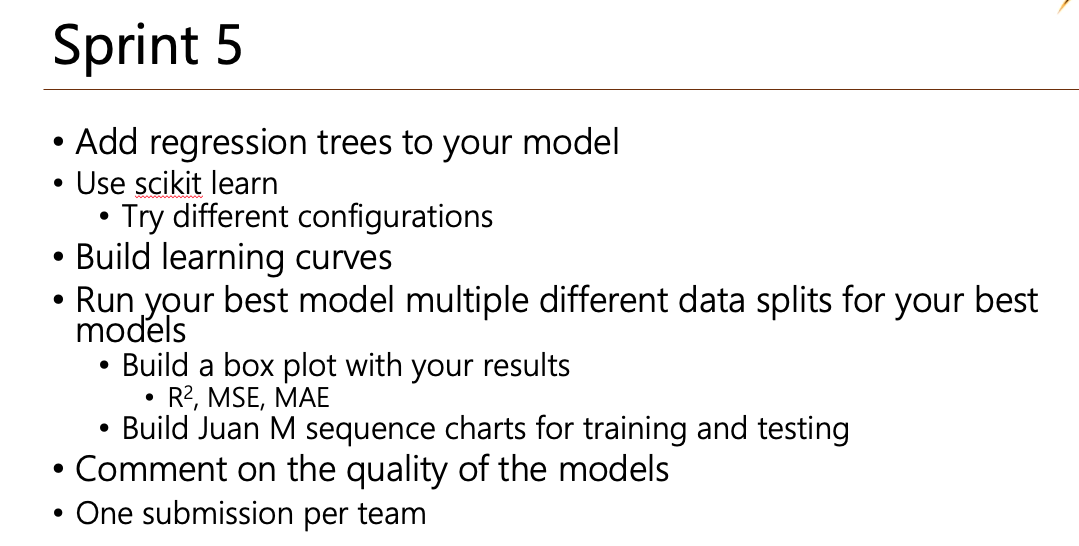

Perhaps we start with dividing hte the weeks work in to 2 parts?

Part 1 is running Porcelana data through LAsso and getting model of line , features and coeffiecnts.

Part 2 is applying Trees to Porcelana



# Part 1: Lasso on Porcelana

Applying o3B to Porcelana

### I am looking into Pickle first in case it is redundant or conflicts with a LAsso Regress.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

# Library

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from matplotlib import pyplot
import seaborn as sns
import pandas
from sklearn.model_selection import train_test_split #Split data in testing and training

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
import urllib

import datetime as dt
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


# evaluate an lasso regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import arange

from yellowbrick.features import ParallelCoordinates
# use automatically configured the lasso regression algorithm
from sklearn.linear_model import LassoCV
import plotly.express as px



# Data

In [4]:
data= pd.read_csv('/content/Porcelana_OP_adelphi_2021_SCALED.csv')
data.head(2)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,913190.407,194276.020,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.00,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.5,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
1,2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1007968.299,228359.839,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.56,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.9,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24


# Covid Dates

Here we add a dummy variable column where covid = 1 and non-covid = 0 and only April 2020 gets "1"

We also look at each 3 month period leading up to May (covid was April) over the prevvious years and see which pattern 2020 most resembles then plug the avg for that matching period in for APril 2020

### Ad a dummy col for covid 1 = covid , 0 = no, Only  April 20 will get a 1

In [5]:
data['covid'] = 0


In [6]:
data.at[39,'covid'] = 1

Convert date to date type and extract  year_month and month to plot by

Now add Month Year col

In [7]:
#data_scaled_dated['date'] = pd.to_datetime(data_scaled_dated['date'])
data['date'] = pd.to_datetime(data['date'])

In [8]:
# Extract month
data['month'] =pd.DatetimeIndex(data['date']).month


In [9]:
#data_scaled_dated['Year_Month'] = data_scaled_dated['date'].dt.strftime('%Y-%m')
data['Year_Month'] = data['date'].dt.strftime('%Y-%m')

In [10]:
data['Month'] = data['date'].dt.strftime('month')

In [ ]:
data.dtypes  # "obj" are date type in Py

Filter out April months and get avg of Quantity for the group

below here

## Quantity Adjusted

We duplicate the Quantity column excpet for April 2020 we plug in the avg for April sales

In [11]:
#df.groupby('a').b.mean()
data.groupby('month').Quantity.mean()

month
1     0.633067
2     0.164373
3    -0.227773
4    -1.303515
5    -0.577581
6    -0.407001
7     0.189838
8    -0.146352
9     0.143780
10    0.719700
11    0.830340
12   -0.048848
Name: Quantity, dtype: float64

In [12]:
data["Quantity_adj"] = data['Quantity']

In [13]:
data.at[39,'Quantity_adj'] =  -1.303515

In [353]:
data.head()

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day,covid,month,Year_Month,Month,Quantity_adj
0,2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,9.131904e+05,194276.0200,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.5680,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.500,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25,0,1,2017-01,month,1.503548
1,2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1.007968e+06,228359.8390,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.5680,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24,0,2,2017-02,month,0.076213
2,2017-03-01,-1.346258,-0.267695,114667.2587,15231.0,1438528.0,5687.0,9544.0,354904.0,1083624.0,1099919.669,1.083268e+06,241130.4555,568447.4880,218640.3600,55049.9274,0.0665,14753.34784,206242.5680,4.69,2943.49,50.43,50.60,102.162670,-21.1,-18.3,-25.4,9.704610,1.215372e+11,9.821204e+10,1.191497e+11,9.035507e+10,9.516119e+10,1.388751e+11,5.266968e+10,1.137228e+11,2.872364e+10,2.258877e+10,1.192185e+11,1.000214e+12,...,5430241.566,555441.9044,7916686.911,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,1,4,26,0,3,2017-03,month,-1.346258
3,2017-04-01,-2.122585,-2.419870,115386.4634,14093.0,1308557.0,5830.0,8263.0,394570.0,913987.0,97

## Some sales graphs

In [14]:
fig = px.line(data, x = 'Year_Month', y = 'Quantity')
fig.show()

In [15]:
fig = px.bar(data, x = 'Year_Month', y = 'Quantity')
fig.show()

In [16]:
fig = px.bar(data, x = 'Year_Month', y = 'Quantity', color = 'month')
fig.show()

In [17]:
fig = px.bar(data, x = 'month', y = 'Quantity', color = 'month', barmode = 'group')
fig.show()

Get monthly averages and we will plug this in for the April 2020 data to smooth out the curve

Subset out Quantity and date


In [18]:
monthly_data = data

In [19]:
Monthly_Quantity = monthly_data[["date","Quantity"]]

In [323]:
Monthly_Quantity.head(3)

,date,Quantity
0,2017-01-01,1.503548
1,2017-02-01,0.076213
2,2017-03-01,-1.346258


In [20]:
Monthly_Quantity.dtypes

date        datetime64[ns]
Quantity           float64
dtype: object

In [21]:
# change index

# set column 'Name' as the index of the Dataframe
#modifiedDF = empDfObj.set_index('Name')

Monthly_Quantity = Monthly_Quantity .set_index('date')

In [ ]:
Monthly_Quantity

In [ ]:
Monthly_Quantity.groupby(pd.Grouper(freq='M')).mean()

In [ ]:
#data_month = data.resample('M', on='Date').mean()
data_month = Monthly_Quantity.resample('M', on='date').mean()

In [ ]:
data_month

In [ ]:
monthly_data.dtypes

Convert month to date time?

In [283]:
monthly_data.dtypes

date                    datetime64[ns]
Quantity                       float64
Seasonal                       float64
Consumer_loans                 float64
Construction_lic_unt           float64
                             ...      
sunday                           int64
working_day                      int64
month                            int64
Year_Month                      object
Month                           object
Length: 946, dtype: object

In [ ]:
data_month

# '#####################'

In [25]:
#First convert to date type data
data['date'] = pd.to_datetime(data['date'])

# Then convert from date type to ordinal
data['date']= data['date'].map(dt.datetime.toordinal)

In [26]:
feature_list = data.loc[: ,data.columns != 'Quantity']

## Following the 03B Multi Liear Regress 

### CREATE PREDICTION PLOTS

In [27]:
def Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test):
    fig, ax = plt.subplots(ncols=2, figsize=(10,4))

    ax[0].scatter(y_train, y_pred_Train)
    ax[0].set_ylim(0,3)
    ax[0].set_xlim(0,3)
    ax[0].grid()
    ax[0].set_xlabel('y')
    ax[0].set_ylabel('yhat')
    ax[0].set_title('Training Set')


    ax[1].scatter(y_test, y_pred_Test)
    ax[1].set_ylim(0,3)
    ax[1].set_xlim(0,3)
    ax[1].grid()
    ax[1].set_xlabel('y')
    ax[1].set_ylabel('yhat')
    ax[1].set_title('Testing Set')
    plt.show()
    return()

### PRINT METRICS

In [28]:
def Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test):
    print('Training Metrics:')
    print('R squared:', metrics.r2_score(y_train, y_pred_Train))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_Train))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_Train))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_Train)))

    print('\nTesting Metrics:')
    print('R squared:', metrics.r2_score(y_test, y_pred_Test))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Test))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Test))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Test)))
    
    return()

### Plot box plots multiple runs

## multiple Runner

In [29]:
def Multiple_Runner(model, X, y):
    
    Train_MSE = [] #Empty list to Store MSEs for training data set
    Test_MSE = []  #Empty list to Store MSEs for testing data set

    Train_R2 = [] #Empty list to Store R2s for training data set
    Test_R2 = []  #Empty list to Store R2s for testing data set

#############################################
###.         NOTE CHANGE BELOW.            ##
#############################################


# Juan's was set for 1,000 runs but did not converge.
#Google suggested increasing number of runs.
# Let us try 10k
    for i in range(1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
        model.fit(X_train, y_train) #Train the model
    
        y_pred_Train  = model.predict(X_train)  #Predictions on training model
        y_pred_Test   = model.predict(X_test)   #Predictions on testing model
    
        train_R2 = metrics.r2_score(y_train, y_pred_Train) #Obtaining the metrics
        test_R2  = metrics.r2_score(y_test, y_pred_Test)
    
        train_MSE = metrics.mean_squared_error(y_train, y_pred_Train)
        test_MSE  = metrics.mean_squared_error(y_test, y_pred_Test)
    
        Train_MSE.append(train_MSE) #Storing the metrics in the lists
        Test_MSE.append(test_MSE) 
    
        Train_R2.append(train_R2) #Storing the metrics in the lists
        Test_R2.append(test_R2)  
    
    print('Train MSE median:', np.median(Train_MSE))
    print('Test MSE median:', np.median(Test_MSE))

    print('\nTrain_R2 median:', np.median(Train_R2))
    print('Test_R2 median:', np.median(Test_R2))

    fig, ax = plt.subplots(ncols=2, figsize=(10,4))

    ax[0].boxplot([Train_MSE, Test_MSE])
    ax[0].set_xticks([1,2],minor = False)                   #setting boxplot names
    ax[0].set_xticklabels(['Train','Test'], minor = False)  #setting boxplot names
    ax[0].grid()
    ax[0].set_title('Mean Squared Error')

    ax[1].boxplot([Train_R2, Test_R2])
    ax[1].set_xticks([1,2],minor = False)
    ax[1].set_xticklabels(['Train','Test'], minor = False)
    ax[1].grid()
    ax[1].set_title('R squared')

    plt.show()

    print('Train MSE standard deviation:', np.std(Train_MSE))
    print('Test MSE standard deviation:', np.std(Test_MSE))

    print('\nTrain_R2 standard deviation:', np.std(Train_R2))
    print('Test_R2 standard deviation:', np.std(Test_R2))

# Data Split

In [ ]:
# Juans technique

#Adv = pd.read_csv('02 Advertising.csv')
#Adv.head(5)

In [ ]:

#First convert to date type data
#data['date'] = pd.to_datetime(data['date'])

# Then convert from date type to ordinal
#data['date']= data['date'].map(dt.datetime.toordinal)

In [30]:
y = data['Quantity']

In [ ]:
# all but "y"
#
X = data.loc[: ,data.columns != 'Quantity']

# Lasso Regression

## Training and predicting

In [ ]:
# This is  is for a 30% split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

LassoReg = Lasso()

#LassoReg = Lasso(normalize=True, alpha = 0.1)  #Default value for alpha = 1
LassoReg = make_pipeline(StandardScaler(with_mean=False), Lasso())

LassoReg.fit(X_train, y_train)

y_pred_Train = LassoReg.predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg.predict(X_test)  #Predictions on testing model

#print('Intercept:',LassoReg.intercept_)
#print('Coefficients:', LassoReg.coef_)

In [ ]:
# this isfor a 30% split

Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)
#x.set_[xy]lim(vmin, vmax)
ax.set_[Xy]lim(0,3)

SyntaxError: ignored

Let us try a 50% split below

In [ ]:
# This is  is for a 50% split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)

LassoReg = Lasso(normalize=True, alpha = 0.1)  #Default value for alpha = 1
LassoReg = make_pipeline(StandardScaler(with_mean=False), Lasso())
LassoReg.fit(X_train, y_train)

y_pred_Train = LassoReg.predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg.predict(X_test)  #Predictions on testing model

#print('Intercept:',LassoReg.intercept_)
#print('Coefficients:', LassoReg.coef_)

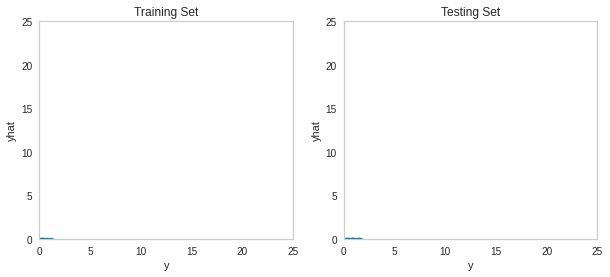

Training Metrics:
R squared: 0.0
Mean Absolute Error: 0.6438750199033506
Mean Squared Error: 0.960373758163747
Root Mean Squared Error: 0.9799866112165753

Testing Metrics:
R squared: -0.14454429765868682
Mean Absolute Error: 0.9155712199120968
Mean Squared Error: 1.1033548780723197
Root Mean Squared Error: 1.0504070059135744


()

In [ ]:
# this isfor a 50% split
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)

Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

In [ ]:
#PLOTLY
#fig = px.scatter(df, x="sepal_width", y="sepal_length")
#fig.show()

fig = px.scatter(data, x="y_train", y="y_pred_Train")
fig.show()

ValueError: ignored

## Parameter Settings

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline i

(0.0, 1.0)

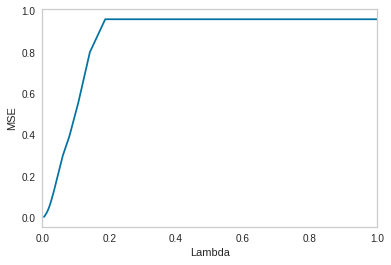

In [ ]:
##Parameter Settingsn

alphas = [0.01, 0.1, 0.25, 0.5, 1, 2.5, 5, 10, 20]

alphas = 10**np.linspace(10,-2,100)*0.5 #create alpha coefficients #More values

LassoReg = Lasso(normalize=True) #Define ridge model
MSE = [] #Store MSE values

for a in alphas:
    LassoReg.set_params(alpha = a)
    LassoReg.fit(X_train, y_train)
    y_pred_Train = LassoReg.predict(X_train) #Predictions on training model
    MSE.append(metrics.mean_squared_error(y_train, y_pred_Train)) 

plt.plot(alphas,MSE)
plt.grid()
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.xlim(0,1)

## R2 Box Plot

Train MSE median: 2.2975574099157013e-10
Test MSE median: 0.9098805794047486

Train_R2 median: 0.9999999997719677
Test_R2 median: -0.2675842849725971


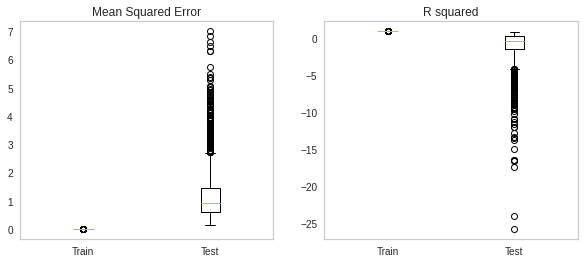

Train MSE standard deviation: 6.947791358498738e-11
Test MSE standard deviation: 1.0999964002470295

Train_R2 standard deviation: 8.635132333429261e-11
Test_R2 standard deviation: 2.7626914016076256


In [ ]:
Multiple_Runner(Lasso(alpha = 0.01), X, y)

# SECT BELOW IS FROM MACH LEARN MASTERY

 https://machinelearningmastery.com/lasso-regression-with-python/

In [ ]:
data = data
data.head()

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,736330,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,9.131904e+05,194276.0200,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.5680,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.500,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
1,736361,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1.007968e+06,228359.8390,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.5680,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24
2,736389,-1.346258,-0.267695,114667.2587,15231.0,1438528.0,5687.0,9544.0,354904.0,1083624.0,1099919.669,1.083268e+06,241130.4555,568447.4880,218640.3600,55049.9274,0.0665,14753.34784,206242.5680,4.69,2943.49,50.43,50.60,102.162670,-21.1,-18.3,-25.4,9.704610,1.215372e+11,9.821204e+10,1.191497e+11,9.035507e+10,9.516119e+10,1.388751e+11,5.266968e+10,1.137228e+11,2.872364e+10,2.258877e+10,1.192185e+11,1.000214e+12,...,4119152.514,6258157.459,3447128.397,478975.7922,1302860.802,5430241.566,555441.9044,7916686.911,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.

In [ ]:
y = data['Quantity']
X = data.loc[: ,data.columns != 'Quantity']

In [ ]:
#First convert to date type data
data['date'] = pd.to_datetime(data['date'])
# Then convert from date type to ordinal
data['date']= data['date'].map(dt.datetime.toordinal)

In [ ]:
# From Jason:
# https://machinelearningmastery.com/lasso-regression-with-python/

# define model
model = Lasso(alpha=1.0)


In [ ]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [ ]:
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 0.768 (0.332)


## New cycle starts here: Tuning Lasso Hyper

---



In [ ]:
data = data
data.head()

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,719163,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,9.131904e+05,194276.0200,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.5680,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.500,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
1,719163,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1.007968e+06,228359.8390,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.5680,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24
2,719163,-1.346258,-0.267695,114667.2587,15231.0,1438528.0,5687.0,9544.0,354904.0,1083624.0,1099919.669,1.083268e+06,241130.4555,568447.4880,218640.3600,55049.9274,0.0665,14753.34784,206242.5680,4.69,2943.49,50.43,50.60,102.162670,-21.1,-18.3,-25.4,9.704610,1.215372e+11,9.821204e+10,1.191497e+11,9.035507e+10,9.516119e+10,1.388751e+11,5.266968e+10,1.137228e+11,2.872364e+10,2.258877e+10,1.192185e+11,1.000214e+12,...,4119152.514,6258157.459,3447128.397,478975.7922,1302860.802,5430241.566,555441.9044,7916686.911,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.

In [ ]:
y = data['Quantity']
X = data.loc[: ,data.columns != 'Quantity']

In [ ]:
#First convert to date type data
data['date'] = pd.to_datetime(data['date'])
# Then convert from date type to ordinal
data['date']= data['date'].map(dt.datetime.toordinal)

In [ ]:
model = Lasso()

In [ ]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)

In [ ]:
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [ ]:
# perform the search
results = search.fit(X, y)

In [ ]:
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.756
Config: {'alpha': 0.02}


# There is a version of Lasso tht has Cross Val builti in

In [ ]:
data = data
data.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)

In [ ]:
y = data['Quantity']
X = data.loc[: ,data.columns != 'Quantity']

In [ ]:
#First convert to date type data
data['date'] = pd.to_datetime(data['date'])
# Then convert from date type to ordinal
data['date']= data['date'].map(dt.datetime.toordinal)

In [ ]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
model = LassoCV(alphas=arange(0, 1, 0.01), cv=cv, n_jobs=-1)
model.fit(X, y)
print('alpha: %f' % model.alpha_)
y_pred_Train = LassoReg.predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg.predict(X_test)  #Predictions on testing model
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

In [ ]:
############### ########
###########################################
###########################################
###########################################
###########################################

In [ ]:
# define model
model = LassoCV(alphas=arange(0, 1, 0.01), cv=cv, n_jobs=-1)

In [ ]:
# fit model
model.fit(X, y)

In [ ]:
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

alpha: 0.010000


Training and Predicting 2

In [ ]:
y_pred_Train = LassoReg.predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg.predict(X_test)  #Predictions on testing model

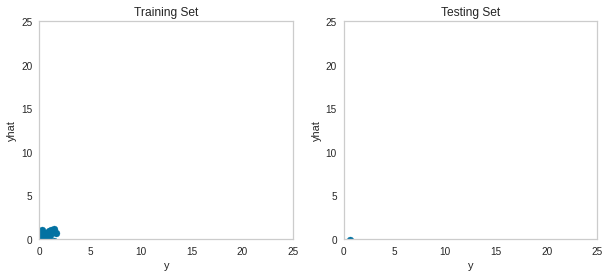

Training Metrics:
R squared: 0.6030727412668008
Mean Absolute Error: 0.3650464769102287
Mean Squared Error: 0.39076220119811556
Root Mean Squared Error: 0.6251097513222102

Testing Metrics:
R squared: 0.7576847834719543
Mean Absolute Error: 0.36235490616559524
Mean Squared Error: 0.20562457041016713
Root Mean Squared Error: 0.45345845499909593


()

In [ ]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

# Lasso for Feature Selection

https://towardsdatascience.com/feature-selection-in-machine-learning-using-lasso-regression-7809c7c2771a

https://github.com/gianlucamalato/machinelearning/blob/master/Feature_selection_using_Lasso.ipynb

So, the idea of using Lasso regression for feature selection purposes is very simple: we fit a Lasso regression on a scaled version of our dataset and we consider only those features that have a coefficient different from 0.



In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [202]:
data = data
data.head(70)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,719163,1.503548,0.699923,112579.429700,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,8.970635e+05,9.131904e+05,194276.020000,502084.833000,171559.966500,45269.587500,0.0694,14753.347840,206242.568000,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,4.445891e+06,6.402426e+06,3.390803e+06,550883.07390,1.302565e+06,4.680431e+06,460632.00000,5.702443e+06,4.657354e+06,7.012296e+06,3.283417e+06,549789.00000,1.454672e+06,4.941982e+06,531850.19260,7.315236e+06,6.120086e+06,8.140200e+06,3.814229e+06,632387.59210,1.627959e+06,4.068021e+06,438682.26790,6.513619e+06,6.137144e+06,6.675101e+06,2.989981e+06,483448.34730,1.298812e+06,3.106784e+06,386289.55250,4.875376e+06,4.791147e+06,5.996089e+06,3.013613e+06,470541.32900,1.093819e+06,1,5,25
1,719163,0.076213,0.316156,113438.094900,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1.025705e+06,1.007968e+06,228359.839000,530826.162500,199731.695000,49050.602500,0.0678,14753.347840,206242.568000,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,6.566090e+06,7.930536e+06,4.347165e+06,677598.18360,1.864167e+06,4.353892e+06,433679.77720,5.854576e+06,4.445891e+06,6.402426e+06,3.390803e+06,550883.07390,1.302565e+06,4.680431e+06,460632.00000,5.702443e+06,4.657354e+06,7.012296e+06,3.283417e+06,549789.00000,1.454672e+06,4.941982e+06,531850.19260,7.315236e+06,6.120086e+06,8.140200e+06,3.814229e+06,632387.59210,1.627959e+06,4.068021e+06,438682.26790,6.513619e+06,6.137144e+06,6.675101e+06,2.989981e+06,483448.34730,1.298812e+06,0,4,24
2,719163,-1.346258,-0.267695,114667.258700,15231.0,1438528.0,5687.0,9544.0,354904.0,1083624.0,1.099920e+06,1.083268e+06,241130.455500,568447.488000,218640.360000,55049.927400,0.0665,14753.347840,206242.568000,4.69,2943.49,50.43,50.60,102.162670,-21.1,-18.3,-25.4,9.704610,1.215372e+11,9.821204e+10,1.191497e+11,9.035507e+10,9.516119e+10,1.388751e+11,5.266968e+10,1.137228e+11,2.872364e+10,2.258877e+10,1.192185e+11,1.000214e+12,...,4.119153e+06,6.258157e+06,3.447128e+06,478975.79220,1.302861e+06,5.430242e+06,555441.90440,7.916687e+06,6.566090e+06,7.930536e+06,4.347165e+06,677598.18360,1.864167e+06,4.353892e+06,433679.77720,5.854576e+06,4.445891e+06,6.402426e+06,3.390803e+06,550883.07390,1.302565e+06,4.680431e+06,4

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Now we have to build our model, optimize its hyperparameter and train it on the training dataset.

Since our dataset needs to be scaled in advance, we can make use of the powerful Pipeline object in scikit-learn. Our pipeline is made by a StandardScaler and the Lasso object itself.

pipeline = Pipeline([
  
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [ ]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

Now we have to optimize the α hyperparameter of Lasso regression. For this example, we are going to test several values from 0.1 to 10 with 0.1 step. For each value, we calculate the average value of the mean squared error in a 5-folds cross-validation and select the value of α that minimizes such average performance metrics.

In [ ]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

We can now fit the grid search.

In [ ]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-0.483 total time=   0.1s
[CV 2/5] END .................model__alpha=0.1;, score=-0.723 total time=   0.1s
[CV 3/5] END .................model__alpha=0.1;, score=-1.598 total time=   0.1s
[CV 4/5] END .................model__alpha=0.1;, score=-0.668 total time=   0.1s
[CV 5/5] END .................model__alpha=0.1;, score=-0.729 total time=   0.0s
[CV 1/5] END .................model__alpha=0.2;, score=-0.383 total time=   0.0s
[CV 2/5] END .................model__alpha=0.2;, score=-0.774 total time=   0.1s
[CV 3/5] END .................model__alpha=0.2;, score=-1.796 total time=   0.1s
[CV 4/5] END .................model__alpha=0.2;, score=-0.724 total time=   0.0s
[CV 5/5] END .................model__alpha=0.2;, score=-0.478 total time=   0.0s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-0.432 total time=   0.0s
[CV 2/5] END .model__alpha=0.30000000000000004;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

The best value for Alph is:

The best value for α is: search.best_params_


In [ ]:
search.best_params_

{'model__alpha': 0.2}

# BEST FEATURES

In [ ]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [ ]:
coefficients

array([ 0.        ,  0.07714976,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.16481132,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.21481977,  0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.  

The importance of a feature is the absolute value of its coefficient, so:

In [ ]:
importance = np.abs(coefficients)


In [ ]:
importance

array([0.        , 0.07714976, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.16481132, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.21481977, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
#features = data.loc[: ,data.columns != 'Quantity']
features = list(X_train.columns.values)

The features that survived the Lasso regression are:

In [ ]:
np.array(features)[importance > 0]

array(['Seasonal', 'Gray_cement_dispatch_comercial', 'ISE',
       'Construction_lic_area/unt_SIlag_4', 'IEClag_5', 'ISElag_6',
       'Gray_cement_dispatch_Factorylag_9', 'ICElag_9',
       'Housing_total_sales', 'Housing_total_initiation_SIlag_24',
       'Ordinary_creditlag_4', 'Ordinary_creditlag_6', 'working_day'],
      dtype='<U37')

In [ ]:
Selected_features = np.array(features)[importance > 0]

In [ ]:
Selected_features

array(['Seasonal', 'Gray_cement_dispatch_comercial', 'ISE',
       'Construction_lic_area/unt_SIlag_4', 'IEClag_5', 'ISElag_6',
       'Gray_cement_dispatch_Factorylag_9', 'ICElag_9',
       'Housing_total_sales', 'Housing_total_initiation_SIlag_24',
       'Ordinary_creditlag_4', 'Ordinary_creditlag_6', 'working_day'],
      dtype='<U37')

### Joe's code to match coeficients and Features names

In [ ]:
# coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['feature_list'])
#coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['features'])
df2 = pd.DataFrame(importance, features)

In [ ]:
df2

,0
date,0.000000
Seasonal,0.077150
Consumer_loans,0.000000
Construction_lic_unt,0.000000
Construction_lic_area,0.000000
...,...
Treasury_loanlag_12,0.000000
Housing_loanlag_12,0.000000
holiday,0.000000
sunday,0.000000


In [ ]:
df2.shape

(942, 1)

In [ ]:
df2.reset_index(level=0, inplace=True)


In [ ]:
df2.head()

,index,0
0,date,0.00000
1,Seasonal,0.07715
2,Consumer_loans,0.00000
3,Construction_lic_unt,0.00000
4,Construction_lic_area,0.00000


Now revise col names

In [ ]:
#df2 = df.set_axis(['V', 'W', 'X', 'Y', 'Z'], axis=1, inplace=False)
df2 = df2.set_axis(['Feature' ,'Coeficient'] ,axis = 1, inplace=False)

In [ ]:
df2

,Feature,Coeficient
0,date,0.000000
1,Seasonal,0.077150
2,Consumer_loans,0.000000
3,Construction_lic_unt,0.000000
4,Construction_lic_area,0.000000
...,...,...
937,Treasury_loanlag_12,0.000000
938,Housing_loanlag_12,0.000000
939,holiday,0.000000
940,sunday,0.000000


Filter rows for > 0

In [ ]:
#filter rows
#above_80 = df[df["Score"] > 80]
df2_selected = df2[df2['Coeficient'] > 0]

In [ ]:
df2_selected

,Feature,Coeficient
1,Seasonal,0.077150
12,Gray_cement_dispatch_comercial,0.164811
22,ISE,0.214820
200,Construction_lic_area/unt_SIlag_4,0.089299
224,IEClag_5,0.025601
262,ISElag_6,0.032867
371,Gray_cement_dispatch_Factorylag_9,0.002456
385,ICElag_9,0.048255
541,Housing_total_sales,0.178597
827,Housing_total_initiation_SIlag_24,0.041464


Lets sort the coeficients

In [ ]:
df2_selected_sorted = df2_selected.sort_values(['Coeficient'] , ascending=False)

In [ ]:
df2_selected_sorted.head(20)

,Feature,Coeficient
22,ISE,0.214820
541,Housing_total_sales,0.178597
12,Gray_cement_dispatch_comercial,0.164811
941,working_day,0.121334
200,Construction_lic_area/unt_SIlag_4,0.089299
1,Seasonal,0.077150
385,ICElag_9,0.048255
827,Housing_total_initiation_SIlag_24,0.041464
262,ISElag_6,0.032867
224,IEClag_5,0.025601


In [ ]:
df2_selected.shape

(13, 2)

In [ ]:
fig = px.bar(df2_selected_sorted, x='Feature', y='Coeficient')
fig.show()

### Maybe make a csv out the file so far and Brian applies Trees to it?

In [ ]:
Working_data = data[['Quantity','Seasonal', 'Gray_cement_dispatch_comercial', 'ISE',
       'Construction_lic_area/unt_SIlag_4', 'ICElag_9',
       'Housing_total_sales', 'Housing_total_initiation_SIlag_24',
       'Ordinary_creditlag_4', 'working_day']]

NameError: ignored

In [ ]:
Working_data.head(20)

In [ ]:
Working_data.shape # That is crazy small data set to forecast the sales 
                   # of an international billion dollar manufacturing co on!

(54, 13)


Juan Porcelana needs the data to be under 6 features.

Gray cement,ICE, ordinary credit lag,and ISE all appear twice,  there 4 right htehre we can drop.



Save Worrking Data to a csv for Brian to start on

In [ ]:
#df.to_csv('file_name.csv', encoding='utf-8')
Working_data.to_csv('Working_data_2.csv' , encoding = 'utf-8')

# Yellow Brick:

# Yellow Model Selection Tutorial

https://www.scikit-yb.org/en/latest/tutorial.html#model-selection-tutorial

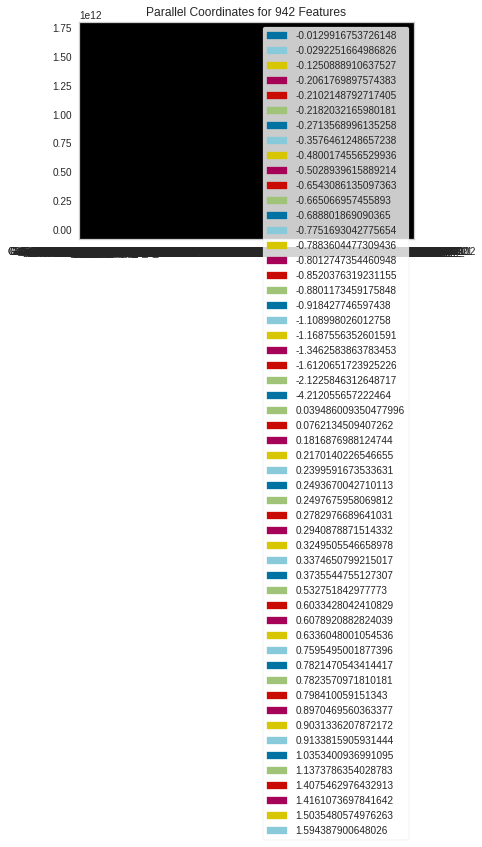

In [ ]:
visualizer = ParallelCoordinates()
visualizer.fit_transform(X, y)
visualizer.show()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning:

invalid value encountered in true_divide



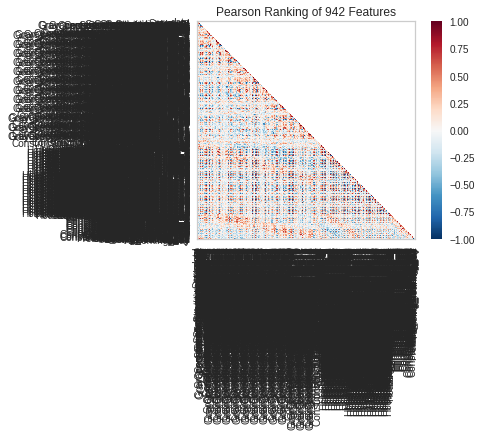

In [ ]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(X)
visualizer.show()

IndexError: ignored

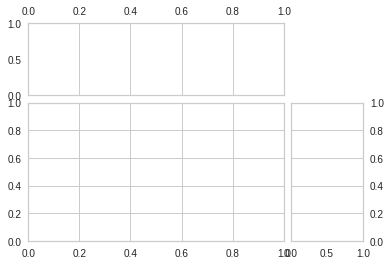

In [ ]:
from yellowbrick.features import JointPlotVisualizer

visualizer = JointPlotVisualizer(columns=['Quantity', 'Consumer_loans'])
visualizer.fit_transform(X, y)
visualizer.show()

In [ ]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1
)

visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [ ]:
import numpy as np

from sklearn.linear_model import RidgeCV
from yellowbrick.regressor import AlphaSelection

alphas = np.logspace(-10, 1, 200)
visualizer = AlphaSelection(RidgeCV(alphas=alphas))
visualizer.fit(X, y)
visualizer.show()

In [ ]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(LassoCV())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

# '##############################################'
# '##############################################'

# Get features and coeficients

using yellow brick

In [ ]:
from yellowbrick.features import ParallelCoordinates

In [ ]:
visualizer = ParallelCoordinates()
visualizer.fit_transform(X, y)
visualizer.show()

# Part 2 Trees on Porcelana